In [2]:
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt

import numpy as np 
import tensorflow as tf
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [4]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img 
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img
    
    
def circle_crop(img, sigmaX):   
    #Create circular crop around image centre
    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

In [6]:
def conv_gray(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (200,200))
    return img

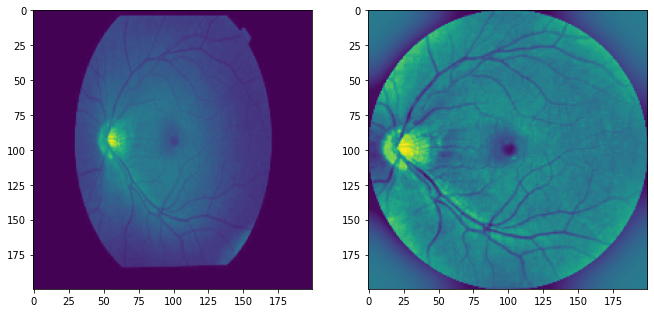

In [8]:
path = r"./Datasets/Glaucoma/G-2.png"
img = cv2.imread(path)
img_t = circle_crop(img,sigmaX = 30)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(cv2.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY),(200,200)))
img_t = conv_gray(img_t)
axarr[1].imshow(img_t)
plt.show()


In [9]:
def convertJpgToPng(path, outPath, imageName):
    c = 1
    directory = path
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            im = Image.open(directory + filename)
            name = imageName +str(c)+'.png'
            im.save(outPath + name)
            c+=1
            continue
        else:
            continue

In [29]:
def convertImages(sourcePath,destPath,dName):
    i = 1
    for image in os.listdir(sourcePath):
        img = cv2.imread(sourcePath + str(image))
        img_t = circle_crop(img,sigmaX = 30)
        cv2.imwrite(destPath + dName + "_" + str(i) + ".png",img_t)
        i += 1

In [30]:
convertImages(r"./Datasets/ARMD/",r"./PreprocessedData/ARMD/","ARMD")

In [31]:
convertImages(r"./Datasets/DR/",r"./PreprocessedData/DR/","DR")
convertImages(r"./Datasets/Glaucoma/",r"./PreprocessedData/Glaucoma/","Glaucoma")
convertImages(r"./Datasets/Healthy/",r"./PreprocessedData/Healthy/","Healthy")

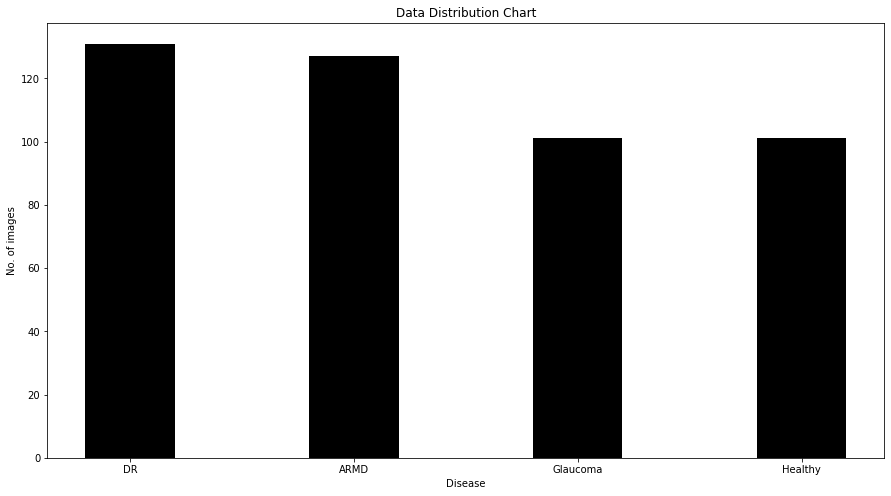

In [36]:
data = {"DR" : len(os.listdir("./PreprocessedData/DR")), "ARMD" : len(os.listdir("./PreprocessedData/ARMD")), "Glaucoma" : len(os.listdir("./PreprocessedData/Glaucoma")), "Healthy" : len(os.listdir("./PreprocessedData/Healthy"))}
diseases = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 8))
 
# creating the bar plot
plt.bar(diseases, values, color ='black', width = 0.4)
 
plt.xlabel("Disease")
plt.ylabel("No. of images")
plt.title("Data Distribution Chart")
plt.show()

In [39]:
def generate_augmentations(lim):
    datagen = ImageDataGenerator(featurewise_center=True,
                                 featurewise_std_normalization=True,
                                 rotation_range=20,
                                 horizontal_flip=True)
    img = cv2.imread(r"./PreprocessedData/DR/DR_1.png")
    img = cv2.resize(img, (200,200))
    plt.imshow(img)
    plt.title('ORIGINAL IMAGE')
    plt.show()
    
    img_arr = img.reshape((1,) + img.shape)
    
    i = 0
    for img_iterator in datagen.flow(x = img_arr,batch_size = 1):
        i = i + 1
        if i > lim:
            break
        plt.imshow((img_iterator.reshape(img_arr[0].shape)).astype(np.uint8))
        plt.title('IMAGE AUGMENTATION ' + str(i))
        plt.show() 

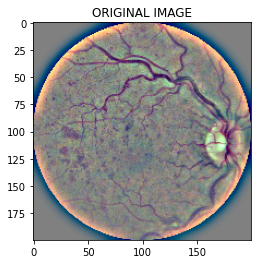

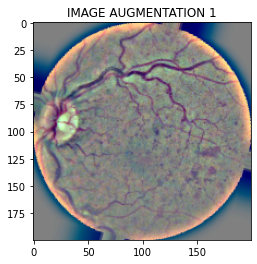

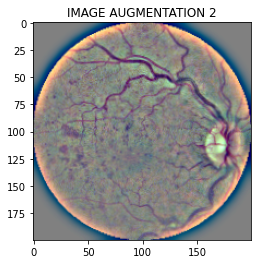

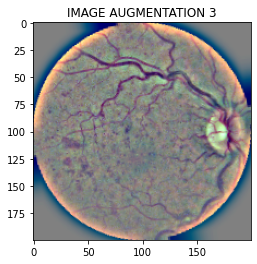

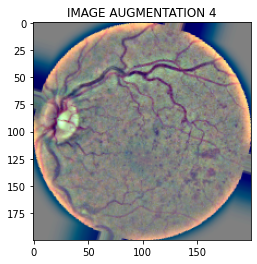

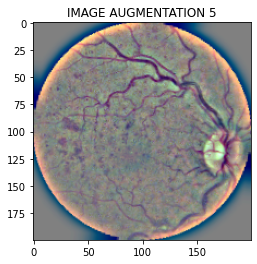

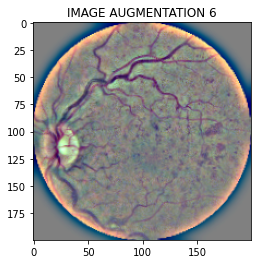

In [40]:
generate_augmentations(6)